# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# 參考 HW-16

In [6]:
selected_data = pd.DataFrame(app_train[['TARGET', 'AMT_GOODS_PRICE']]) # subset

In [7]:
selected_data['AMT_G_P_binned'] = pd.qcut(selected_data['AMT_GOODS_PRICE'], 4)

In [8]:
selected_data['AMT_G_P_binned'].head(10)

0     (238500.0, 450000.0]
1    (679500.0, 4050000.0]
2    (40499.999, 238500.0]
3     (238500.0, 450000.0]
4     (450000.0, 679500.0]
5     (450000.0, 679500.0]
6    (679500.0, 4050000.0]
7    (679500.0, 4050000.0]
8    (679500.0, 4050000.0]
9     (238500.0, 450000.0]
Name: AMT_G_P_binned, dtype: category
Categories (4, interval[float64]): [(40499.999, 238500.0] < (238500.0, 450000.0] < (450000.0, 679500.0] < (679500.0, 4050000.0]]

In [9]:
selected_data['AMT_G_P_binned'].value_counts()

(40499.999, 238500.0]    79877
(238500.0, 450000.0]     78102
(679500.0, 4050000.0]    75534
(450000.0, 679500.0]     73720
Name: AMT_G_P_binned, dtype: int64

In [10]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
groups = selected_data.groupby('AMT_G_P_binned').mean()
groups

,TARGET,AMT_GOODS_PRICE
AMT_G_P_binned,,
"(40499.999, 238500.0]",0.079723,1.794767e+05
"(238500.0, 450000.0]",0.109280,3.606513e+05
"(450000.0, 679500.0]",0.074769,5.812188e+05
"(679500.0, 4050000.0]",0.058106,1.059946e+06


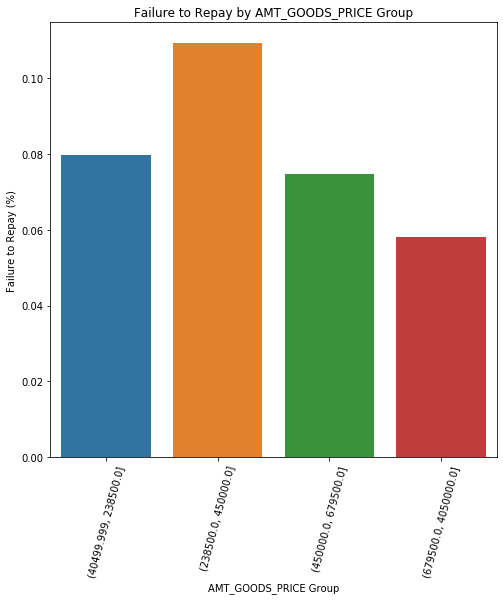

In [11]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot

px = groups.index
py = groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_GOODS_PRICE Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT_GOODS_PRICE Group');